### Why do we need camera calibration?

Image distortion occurs when a camera looks at 3D object in the real world and transforms them into a 2D image. 

![title](res/3d_to_2d.PNG)


- https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html

In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [2]:
#termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
FILE_NAME = "calib_radial.jpg"
img = cv.imread(FILE_NAME)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
#Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (7,6), None)

In [5]:
#prepare object points, like (0,0,0), (1,0,0), (2,0,0)..., (6,5,0)
objp = np.zeros((6*7, 3), np.float32)
objp[:,:2] = np.mgrid[0:7, 0:6].T.reshape(-1,2)

#Arrays to store object points and image points from all the images
objpoints = [] #3d point in real world space
imgpoints = [] #2d points in image plane


    

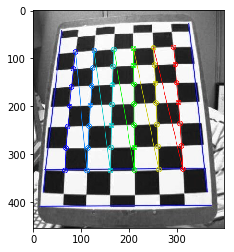

In [6]:
if ret == True:
    
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1, -1), criteria)
    imgpoints.append(corners)

    cv.drawChessboardCorners(img, (7,6), corners2, ret)

    plt.imshow(img)
    plt.show()
    

### Calibration

In [7]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

### Undistortion

In [8]:
img = cv.imread(FILE_NAME)
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

#### Using cv.undistort

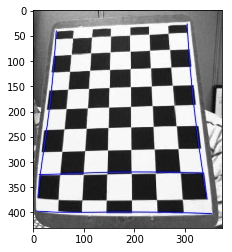

In [11]:
#undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

#crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

plt.imshow(dst)
plt.show()

#### Using remapping

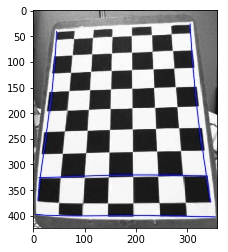

In [10]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

#crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

plt.clf()
plt.imshow(dst)
plt.show()